#### (e) Coding

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


1. $\epsilon=0$ with an optimistic initial value $Q_0 = 5$

In [9]:
eps = 0

reward_all = np.zeros((2000, 1000))
optimal_action_all = np.zeros((2000, 1000))
for game in range(2000):
    value_true = np.random.normal(0, 1, 10)
    best_action = np.argmax(value_true)
    
    value_est = np.zeros(10) + 5  # Optimistic initial value = 5
    action_count = np.zeros(10)

    for step in range(1000):
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            max_value = np.max(value_est)  # Greedy
            action = np.random.choice([i for i in range(10) if value_est[i] == max_value])
        
        # Optimal action?
        if action == best_action: optimal_action_all[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all[game, step] = reward

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - 1 / action_count[action]) * value_est[action] + reward / action_count[action]
    
    if (game + 1) % 400 == 0: print("Game", game + 1,  "Done!")


Game 400 Done!
Game 800 Done!
Game 1200 Done!
Game 1600 Done!
Game 2000 Done!


2. $\epsilon=0.1$ greedy strategy with UCB

In [10]:
eps = 0.1

reward_all_1 = np.zeros((2000, 1000))
optimal_action_all_1 = np.zeros((2000, 1000))
for game in range(2000):
    value_true = np.random.normal(0, 1, 10)
    best_action = np.argmax(value_true)
    
    value_est = np.zeros(10)
    action_count = np.zeros(10)

    for step in range(1000):
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            confidence = np.array([2 * np.sqrt(np.log(step + 1) / max(n, 1)) for n in action_count])
            
            action = np.argmax(value_est + confidence)  # Greedy
        
        # Optimal action?
        if action == best_action: optimal_action_all_1[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all_1[game, step] = reward

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - 1 / action_count[action]) * value_est[action] + reward / action_count[action]
    
    if (game + 1) % 400 == 0: print("Game", game + 1,  "Done!")


Game 400 Done!
Game 800 Done!
Game 1200 Done!
Game 1600 Done!
Game 2000 Done!


3. $\epsilon=0.01$ greedy strategy with UCB

In [11]:
eps = 0.01

reward_all_2 = np.zeros((2000, 1000))
optimal_action_all_2 = np.zeros((2000, 1000))
for game in range(2000):
    value_true = np.random.normal(0, 1, 10)
    best_action = np.argmax(value_true)
    
    value_est = np.zeros(10)
    action_count = np.zeros(10)

    for step in range(1000):
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            confidence = np.array([2 * np.sqrt(np.log(step + 1) / max(n, 1)) for n in action_count])
            
            action = np.argmax(value_est + confidence)  # Greedy
        
        # Optimal action?
        if action == best_action: optimal_action_all_2[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all_2[game, step] = reward

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - 1 / action_count[action]) * value_est[action] + reward / action_count[action]
    
    if (game + 1) % 400 == 0: print("Game", game + 1,  "Done!")


Game 400 Done!
Game 800 Done!
Game 1200 Done!
Game 1600 Done!
Game 2000 Done!


<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_20816/3209994304.py:2: SyntaxWarning: invalid escape sequence '\e'
  ax[0].plot(reward_all.mean(axis=0), color='purple', label='$\epsilon = 0$ opt. initial', lw=0.85)
/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_20816/3209994304.py:3: SyntaxWarning: invalid escape sequence '\e'
  ax[0].plot(reward_all_1.mean(axis=0), co

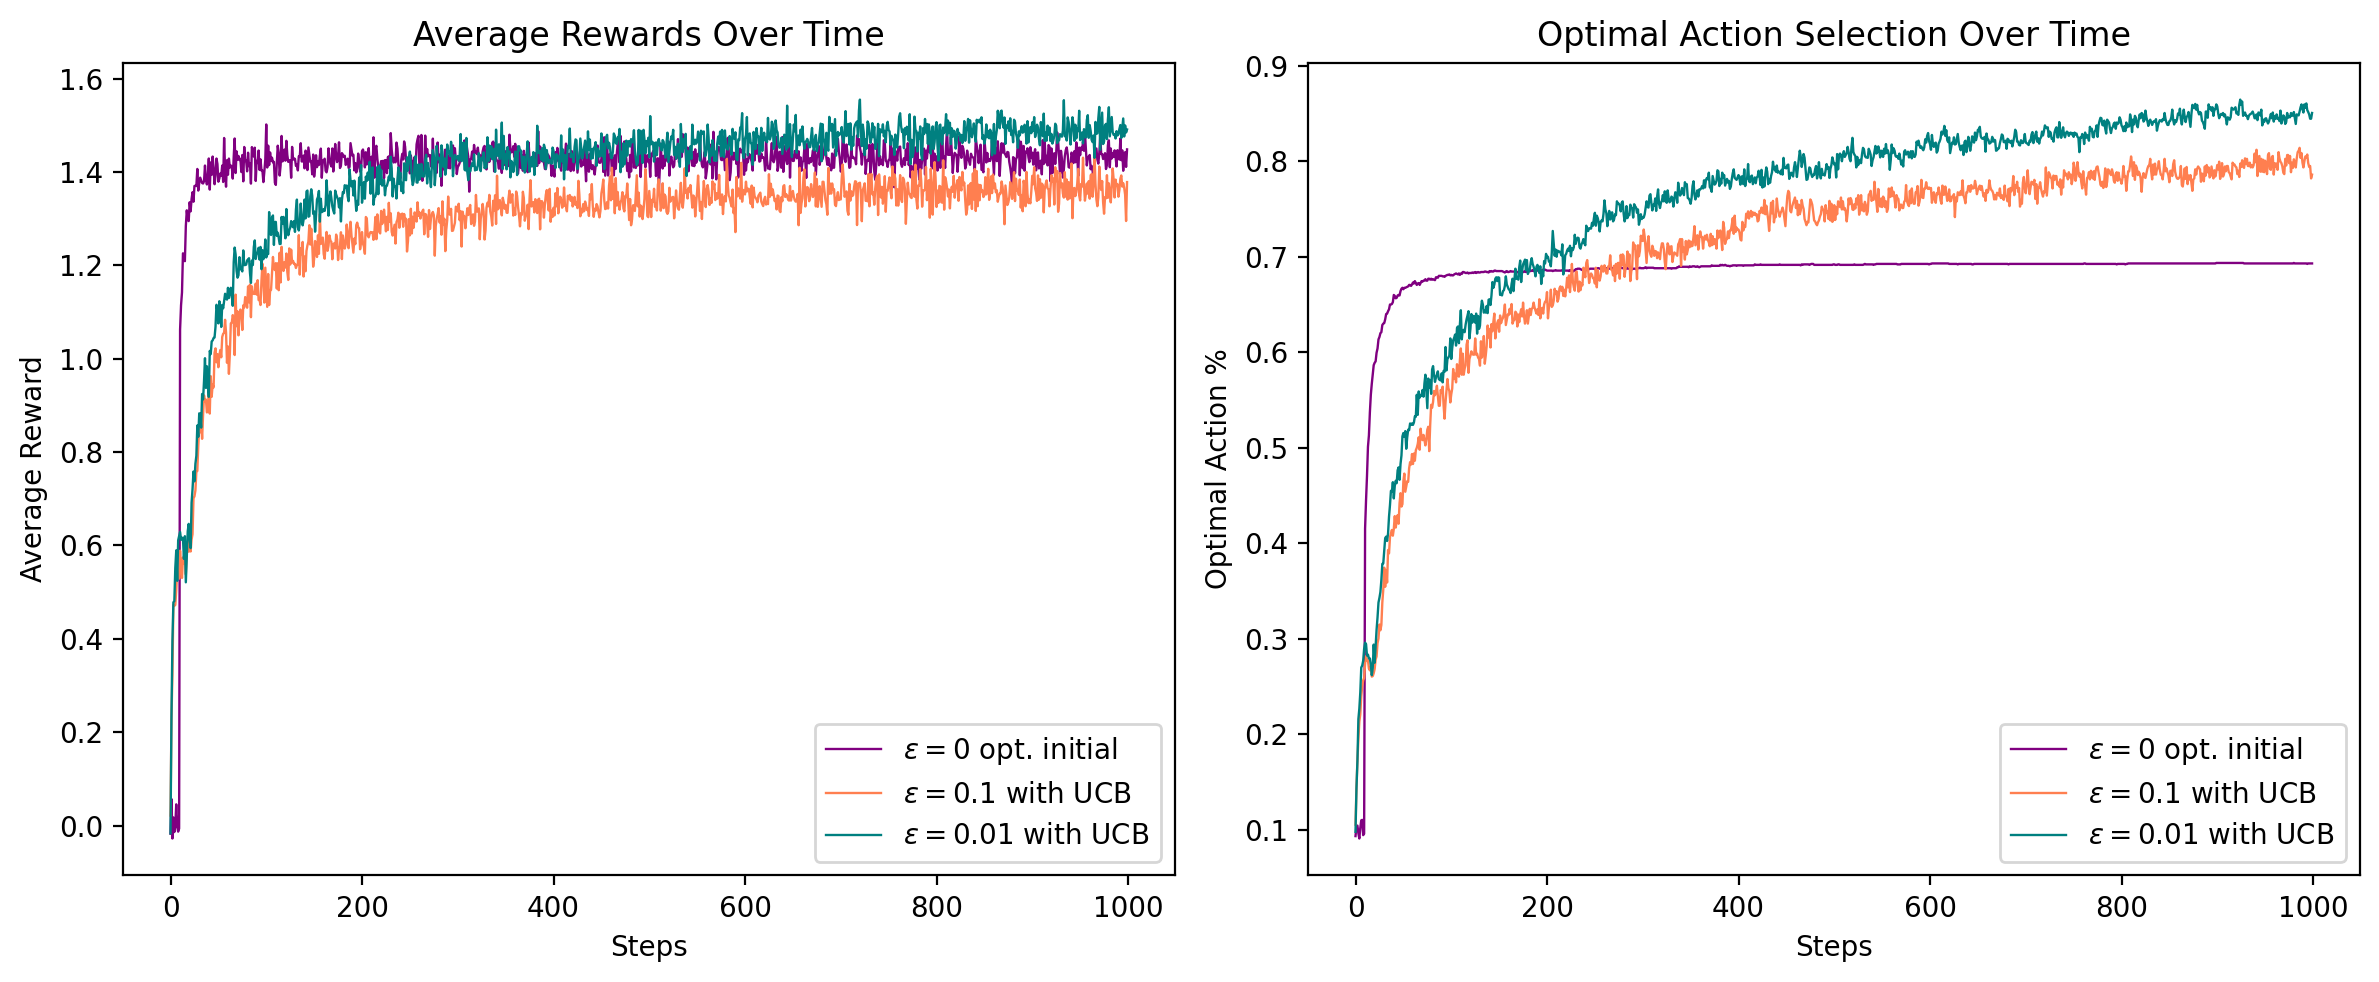

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(reward_all.mean(axis=0), color='purple', label='$\epsilon = 0$ opt. initial', lw=0.85)
ax[0].plot(reward_all_1.mean(axis=0), color='coral', label='$\epsilon=0.1$ with UCB', lw=0.85)
ax[0].plot(reward_all_2.mean(axis=0), color='teal', label='$\epsilon=0.01$ with UCB', lw=0.85)
ax[0].set_title("Average Rewards Over Time")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

ax[1].plot(optimal_action_all.mean(axis=0), color='purple', label='$\epsilon = 0$ opt. initial', lw=0.85)
ax[1].plot(optimal_action_all_1.mean(axis=0), color='coral', label='$\epsilon=0.1$ with UCB', lw=0.85)
ax[1].plot(optimal_action_all_2.mean(axis=0), color='teal', label='$\epsilon=0.01$ with UCB', lw=0.85)
ax[1].set_title("Optimal Action Selection Over Time")  # Title for the second subplot
ax[1].set_xlabel("Steps")  # X-axis label for the second subplot
ax[1].set_ylabel("Optimal Action %") 
ax[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
fig.savefig("Q2-e.png", dpi=150)

#### (f) Coding

1. Sample Averages

In [3]:
eps= 0.1

optimal_action_all_3 = np.zeros((2000, 10000))
reward_all_3 = np.zeros((2000, 10000))

for game in range(2000):
    value_true = np.zeros(10)  # Value starts equal
    
    value_est = np.zeros(10)
    action_count = np.zeros(10)

    for step in range(10000):
        # Update value function
        if step != 0:
            value_true += np.random.normal(0, 0.01, 10)  # Random walk update of true values
        best_action = np.argmax(value_true)
        
        # Select action
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            action = np.argmax(value_est)
        
        # Optimal action?
        if action == best_action: optimal_action_all_3[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all_3[game, step] = reward

        # Update
        action_count[action] += 1
        alpha = 1 / action_count[action]
        value_est[action] = (1 - alpha) * value_est[action] + reward * alpha
    
    if (game + 1) % 250 == 0: print("Game", game + 1,  "Done!")


Game 250 Done!
Game 500 Done!
Game 750 Done!
Game 1000 Done!
Game 1250 Done!
Game 1500 Done!
Game 1750 Done!
Game 2000 Done!


2. Fixed $\alpha = 0.1$

In [6]:
eps, alpha = 0.1, 0.1

optimal_action_all_4 = np.zeros((2000, 10000))
reward_all_4 = np.zeros((2000, 10000))

for game in range(2000):
    value_true = np.zeros(10)  # Value starts equal
    
    value_est = np.zeros(10) # Optimistic initial value = 5
    action_count = np.zeros(10)

    for step in range(10000):
        # Update value function
        if step != 0:
            value_true += np.random.normal(0, 0.01, 10)  # Random walk update of true values
        best_action = np.argmax(value_true)
        
        # Select action
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            action = np.argmax(value_est)
        
        # Optimal action?
        if action == best_action: optimal_action_all_4[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all_4[game, step] = reward

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - alpha) * value_est[action] + reward * alpha
    
    if (game + 1) % 250 == 0: print("Game", game + 1,  "Done!")


Game 250 Done!
Game 500 Done!
Game 750 Done!
Game 1000 Done!
Game 1250 Done!
Game 1500 Done!
Game 1750 Done!
Game 2000 Done!


<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_20816/730595007.py:2: SyntaxWarning: invalid escape sequence '\e'
  ax[0].plot(reward_all_3.mean(axis=0), color='purple', label='$\epsilon = 0.1$ sample average update', lw=0.85)
/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_20816/730595007.py:3: SyntaxWarning: invalid escape sequence '\e'
  ax[0].plot(reward_all_4.mean(axis=0), color='coral', label='$\epsilon=0.1$ fixed stepsize update', lw=0.85)
/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_20816/730595007.py:9: SyntaxWarning: invalid escape sequence '\e'


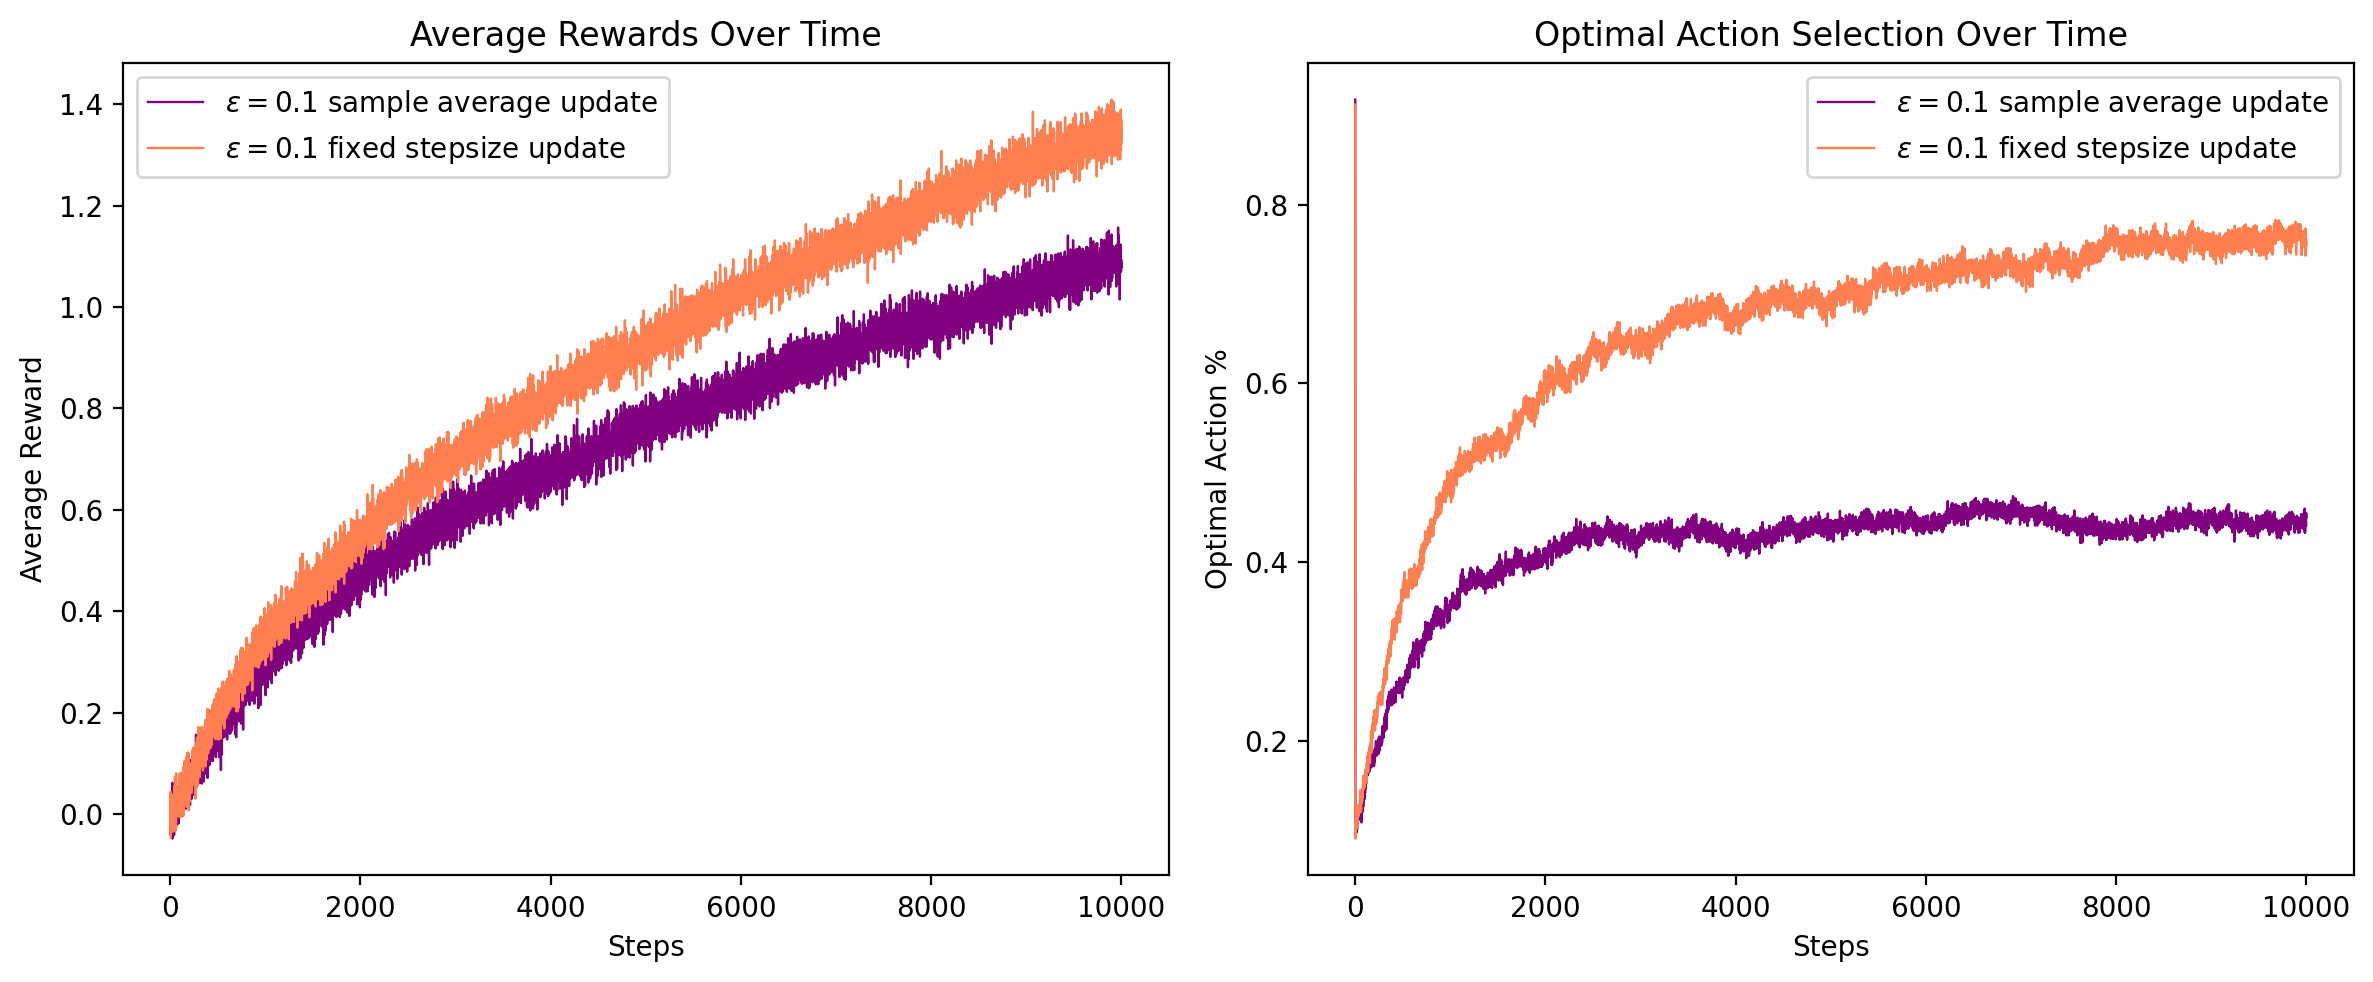

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(reward_all_3.mean(axis=0), color='purple', label='$\epsilon = 0.1$ sample average update', lw=0.85)
ax[0].plot(reward_all_4.mean(axis=0), color='coral', label='$\epsilon=0.1$ fixed stepsize update', lw=0.85)
ax[0].set_title("Average Rewards Over Time")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

ax[1].plot(optimal_action_all_3.mean(axis=0), color='purple', label='$\epsilon = 0.1$ sample average update', lw=0.85)
ax[1].plot(optimal_action_all_4.mean(axis=0), color='coral', label='$\epsilon=0.1$ fixed stepsize update', lw=0.85)
ax[1].set_title("Optimal Action Selection Over Time")  # Title for the second subplot
ax[1].set_xlabel("Steps")  # X-axis label for the second subplot
ax[1].set_ylabel("Optimal Action %") 
ax[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
fig.savefig("Q2-f.png", dpi=150)